## Importing required Python modules and data description

In [4]:
import matplotlib.pyplot as plt # visualization
import numpy as np
import pandas as pd
import random
import seaborn as sns # visualization
from statsmodels.graphics.gofplots import qqplot # visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# just to jupyter notebook be capable of execute matplotlib
%matplotlib inline

from pandas.plotting import register_matplotlib_converters # avoid erros between pandas and matplotlib
register_matplotlib_converters()

In [5]:
# Importing dataset 
car = pd.read_csv('Automobile_data.csv')

# Seeing the first 5 rows
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
# Seeing dataset structure
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [7]:
# seeing dataset shape and unique values
print('Rows     :',car.shape[0])
print('Columns  :',car.shape[1])
print('\nUnique values :  \n',car.nunique())

Rows     : 205
Columns  : 26

Unique values :  
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64


In [8]:
# Seeing columns
car.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Cleaning and Preprocessing data
(Dealing with missing values)

In [85]:
# Looking for total missing values in each column
print(car.isna().sum())
print('\nMissing values    :',car.isnull().values.sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
height               0
engine-type          0
num-of-cylinders     0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
len_wid              0
hpw_eng_size         0
hway_cit_mpg         0
hpw_cylinders        0
mean_mpg_hpw         0
price                0
dtype: int64

Missing values    : 0


In [10]:
# Creating a list with the possible characters that are replacing missing values
missing_values = ['?','--','-','??','.']

# Importing dataset from UCI Machine Learning Repository
car = pd.read_csv('Automobile_data.csv',na_values = missing_values)

# Seeing the first 5 rows
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [12]:
# Verifying continuos variables
car.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


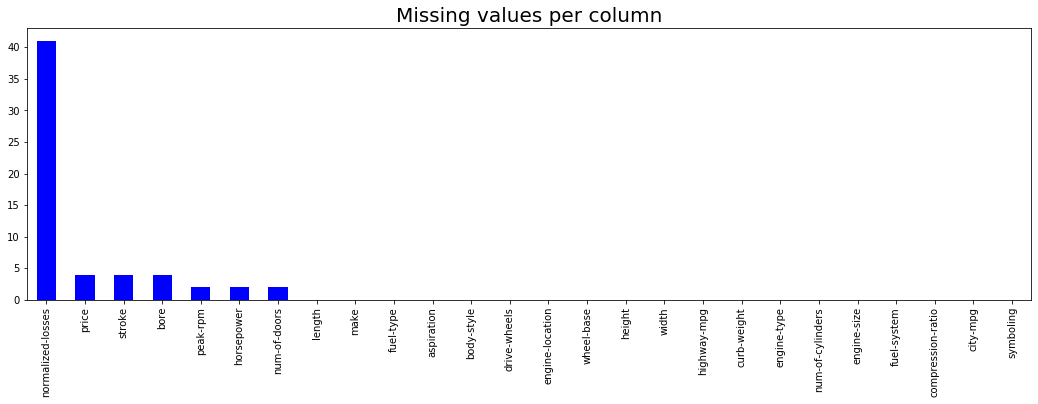

In [14]:
# Ploting missing values percentage in each dataset
plt.subplots(0,0, figsize = (18,5))
ax = (car.isnull().sum()).sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values per column', fontsize = 20);

In [17]:
# Interpolating a linear regression to replace missing values in continuos variables
car['normalized-losses'] = car['normalized-losses'].interpolate(method = "linear"
                                      ,limit_direction = "both")

car['price'] = car['price'].interpolate(method = "linear"
                                      ,limit_direction = "both")

car['stroke'] = car['stroke'].interpolate(method = "linear"
                                      ,limit_direction = "both")

car['bore'] = car['bore'].interpolate(method = "linear"
                                      ,limit_direction = "both")

car['peak-rpm'] = car['peak-rpm'].interpolate(method = "linear"
                                      ,limit_direction = "both")

car['horsepower'] = car['horsepower'].interpolate(method = "linear"
                                      ,limit_direction = "both")

In [19]:
# Counting number of missing values in num_of_doors
car['num-of-doors'].isna().sum()

2

In [20]:
# Looking what body_style and make our missing values have
car[['make','body-style']][car['num-of-doors'].isnull()==True]

,make,body-style
27,dodge,sedan
63,mazda,sedan


In [21]:
# Seeing how many doors a mazda sedan have
car['num-of-doors'][(car['body-style']=='sedan') & (car['make']=='mazda')]

53    four
54    four
60    four
62    four
63     NaN
65    four
66    four
Name: num-of-doors, dtype: object

In [22]:
# Seeing how many doors a dodge sedan have
car['num-of-doors'][(car['body-style']=='sedan') & (car['make']=='dodge')]

25    four
26    four
27     NaN
Name: num-of-doors, dtype: object

In [23]:
# Replacing missing values into num_of_doors
car['num-of-doors'] = car['num-of-doors'].fillna('four')

In [24]:
# Verifying missing alues
car.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Exploratory Data Analysis

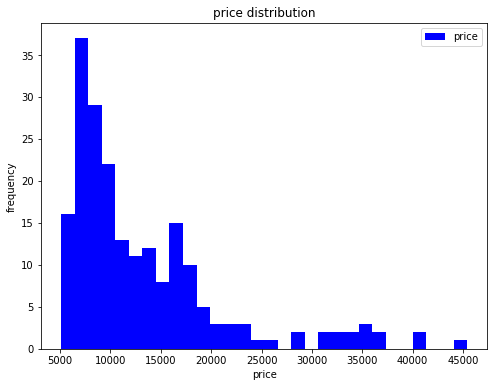

In [26]:
# Plotting a histogram of our feature price
plt.figure(figsize=(8,6)) # creating the figure
plt.hist(car['price'] # plotting the histogram
         ,bins=30 # defyning number of bars
         ,label='price' # add legend
        ,color='blue') # defyning the color

plt.xlabel('price') # add xlabel
plt.ylabel('frequency') # add ylabel
plt.legend()
plt.title('price distribution');

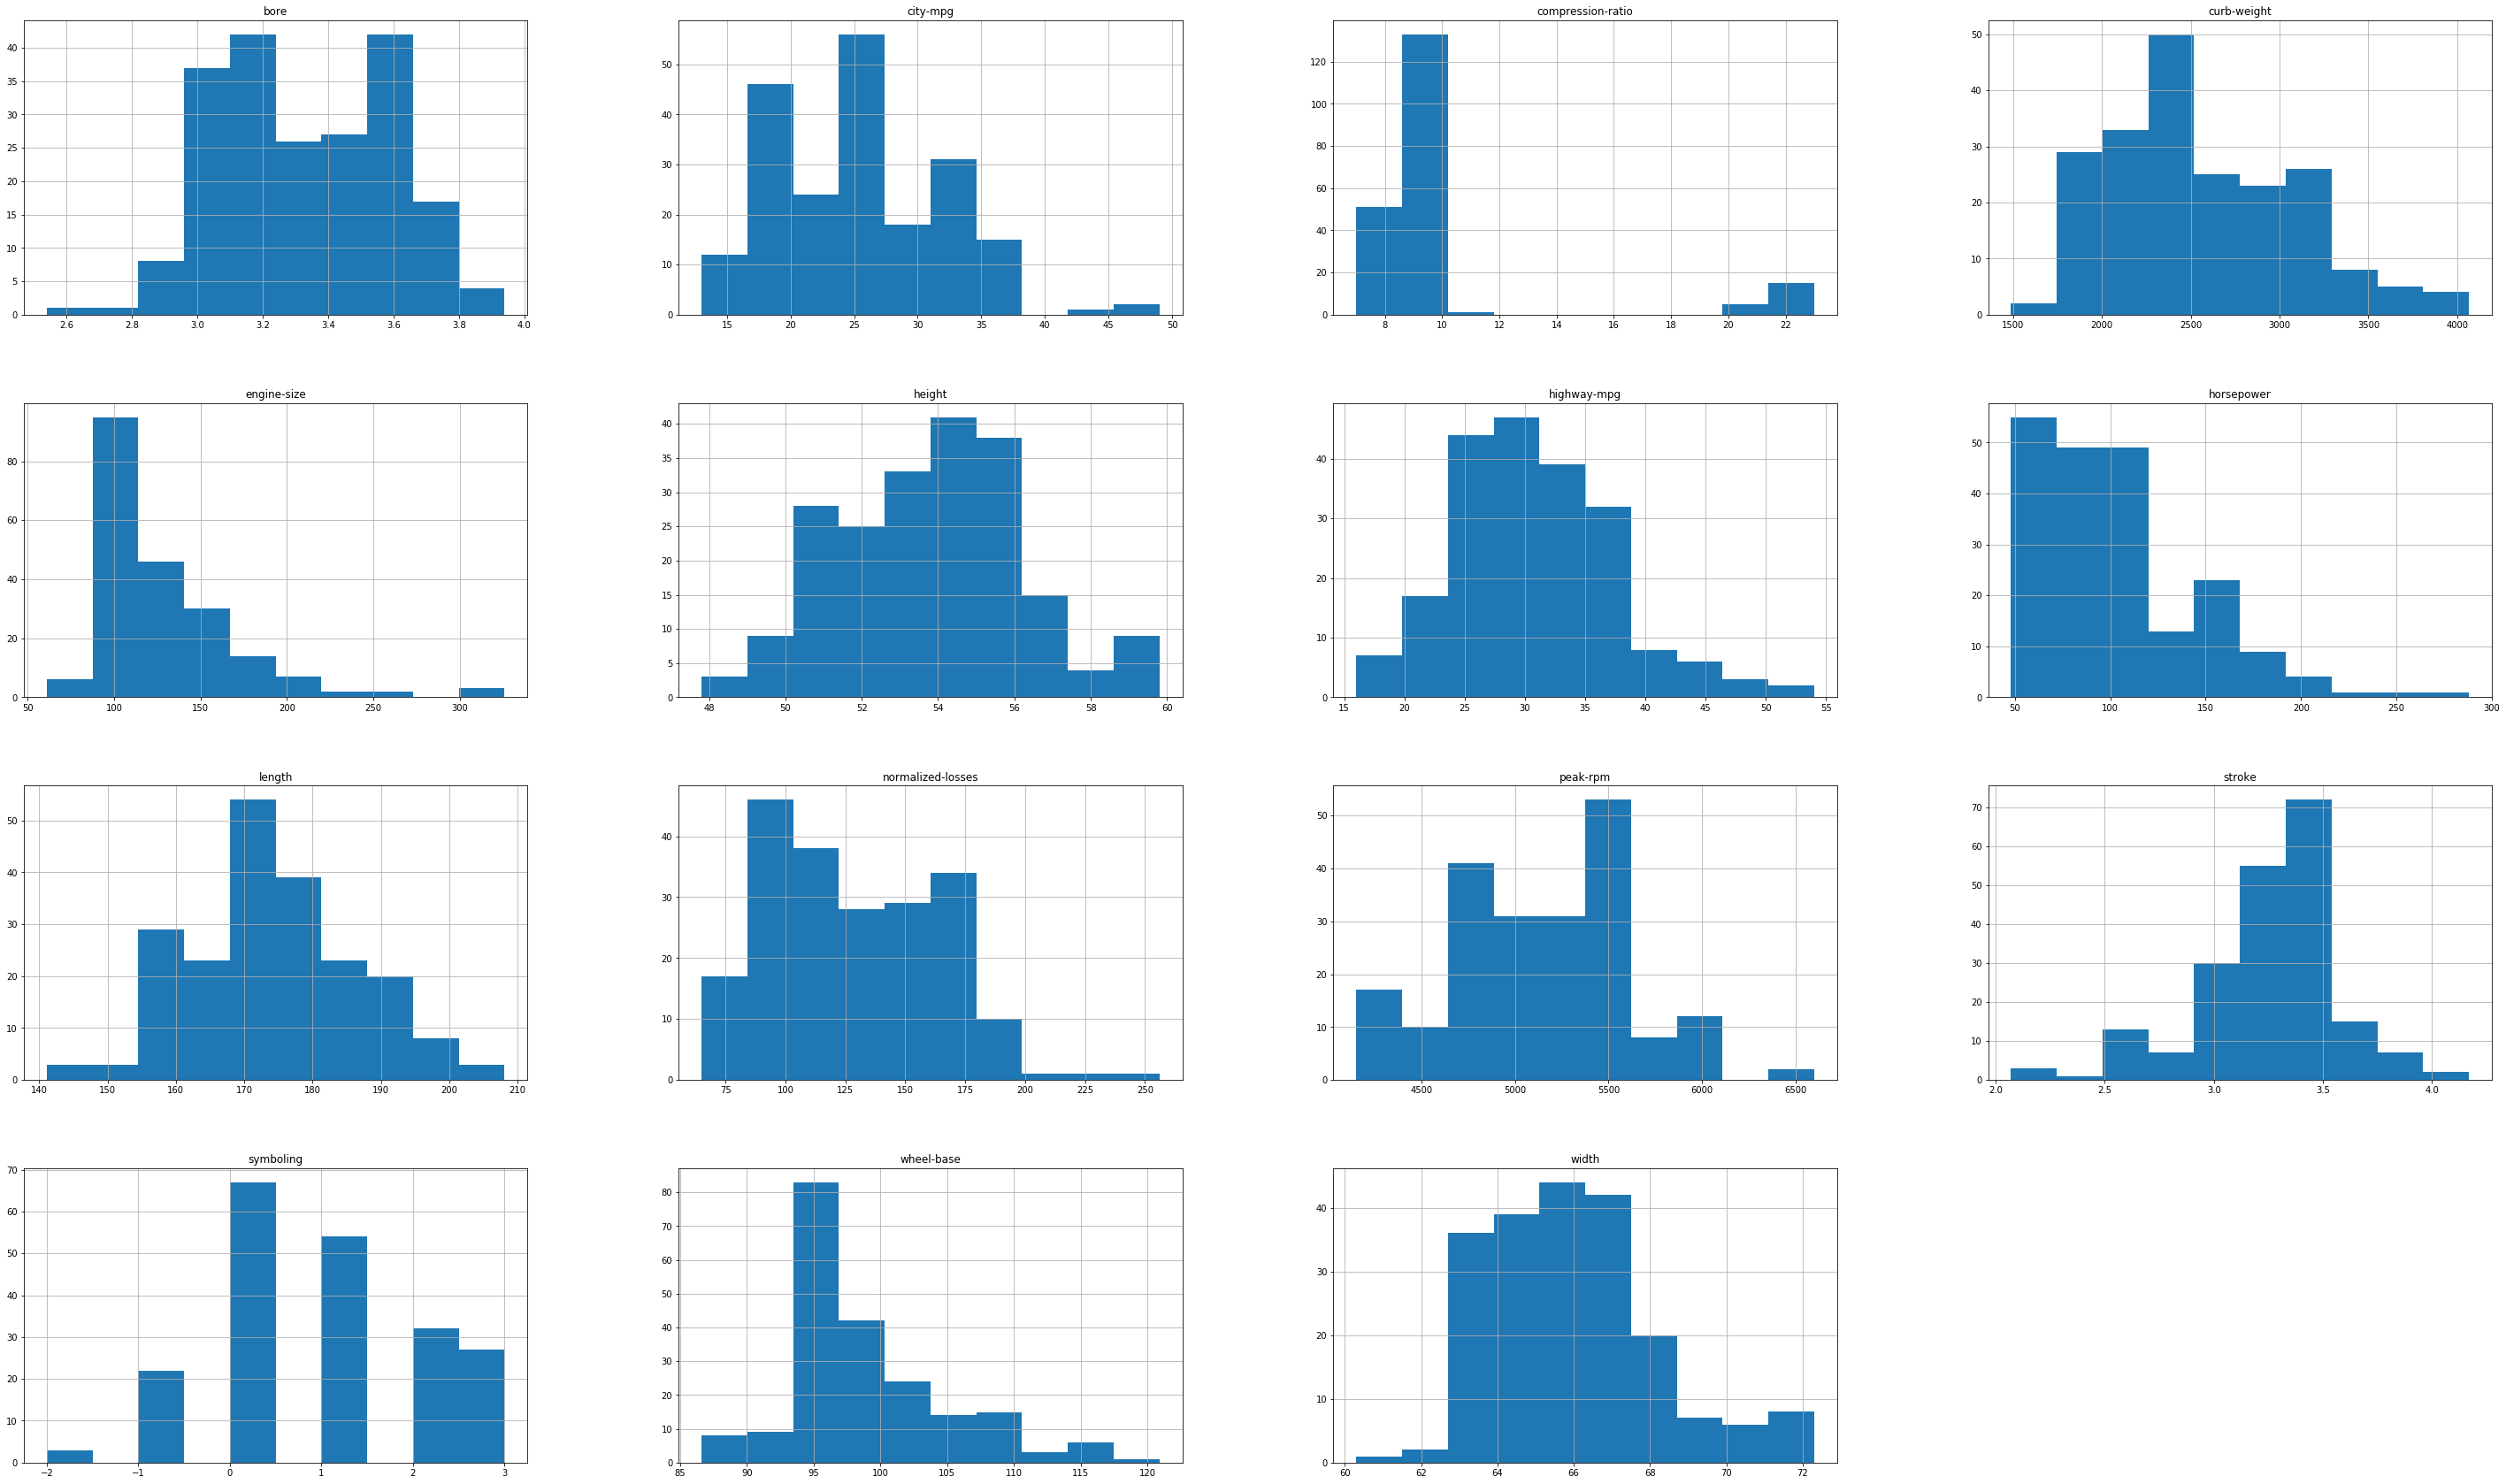

In [28]:
# Saving numerical features
num_var = ['symboling','normalized-losses','wheel-base','length'
          ,'width','height','curb-weight','engine-size','bore'
           ,'stroke','compression-ratio','horsepower','peak-rpm'
           ,'city-mpg','highway-mpg']

# plotting a histogram for each feature
car[num_var].hist(bins=10
                   , figsize=(50,30)
                   , layout=(4,4));

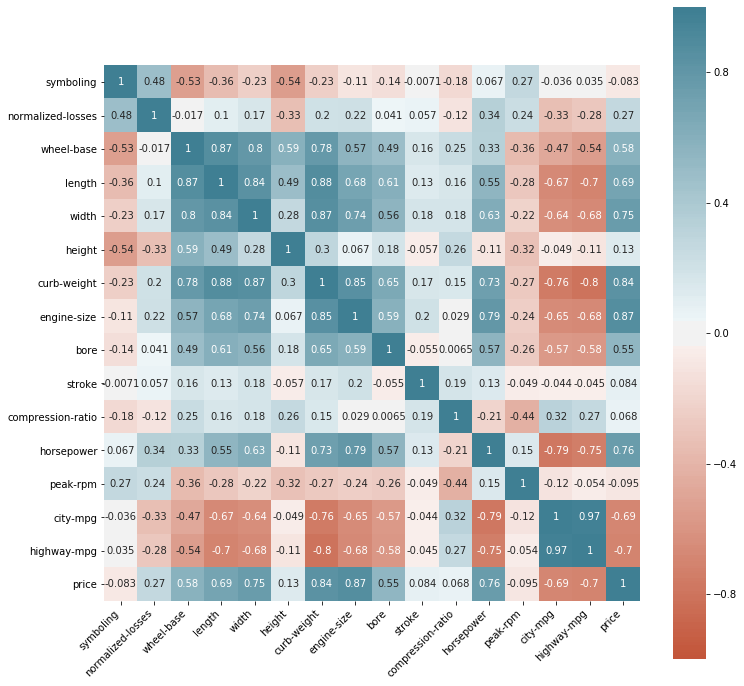

In [30]:
# Numerical variables correlation
corr = car.corr() # creting the correlation matrix

plt.figure(figsize=(12,12)) # creating the and difyning figure size
ax = sns.heatmap( # plotting correlation matrix
    corr,vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels( # adding axes values
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

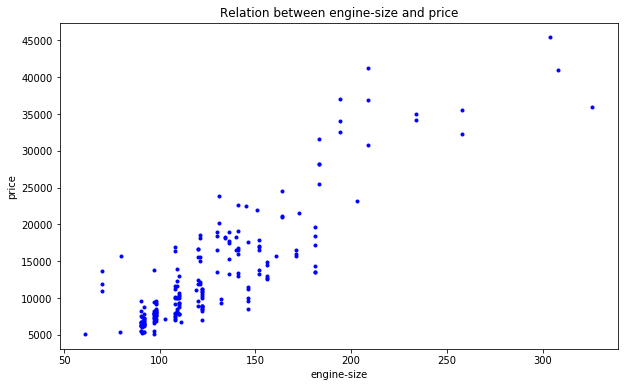

In [31]:
# Plotting a scatter plot of relation between engine_size and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['engine-size'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('engine-size') # add xlabel
plt.ylabel('price') # add ylabel
plt.title('Relation between engine-size and price');

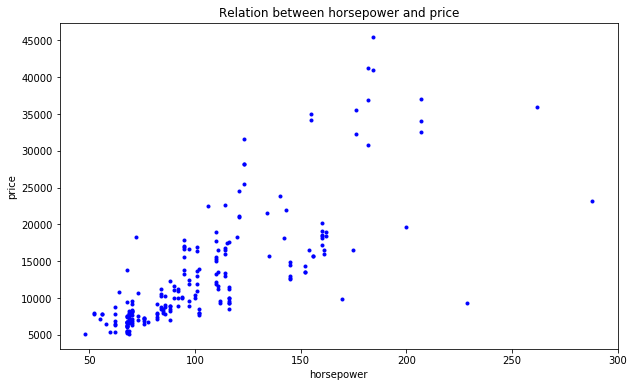

In [32]:
# Plotting a scatter plot of relation between horsepower and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['horsepower'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('horsepower') # add xlabel
plt.ylabel('price') # add ylabel
plt.title('Relation between horsepower and price');

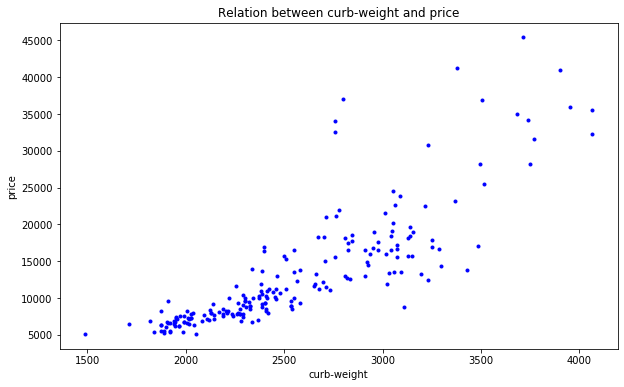

In [33]:
# Plotting a scatter plot of relation between curb_weight and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['curb-weight'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('curb-weight')
plt.ylabel('price')
plt.title('Relation between curb-weight and price');

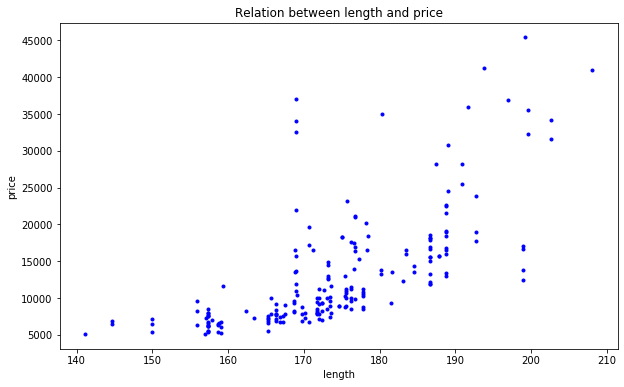

In [34]:
# Plotting a scatter plot of relation between length and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['length'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('length')
plt.ylabel('price')
plt.title('Relation between length and price');

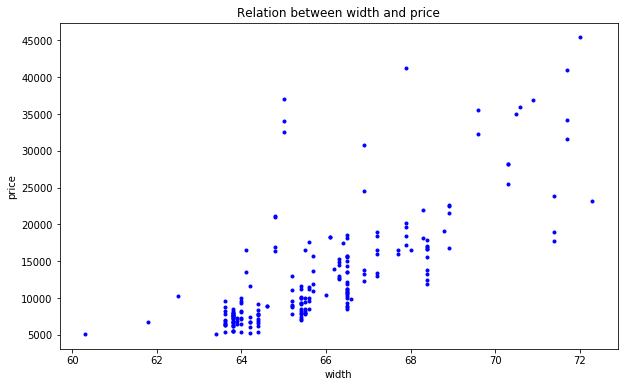

In [35]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['width'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('width')
plt.ylabel('price')
plt.title('Relation between width and price');

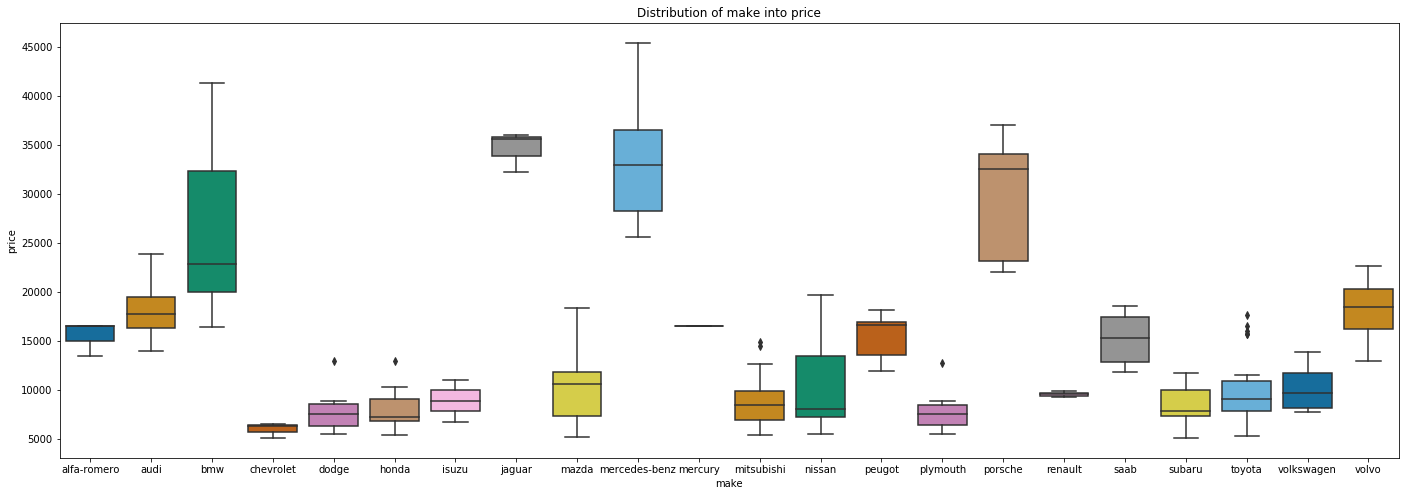

In [37]:
# Plotting Distribution of maker into price
plt.figure(figsize=(24,8))
sns.boxplot(x='make',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of make into price');

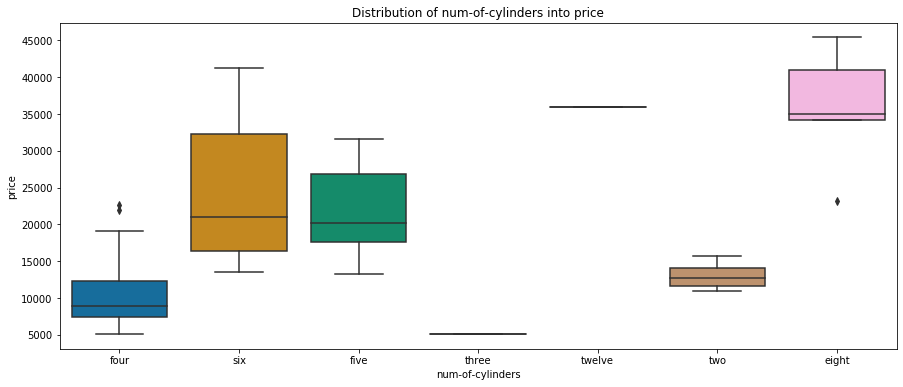

In [38]:
# Plotting Distribution of num_of_cylinders into price
plt.figure(figsize=(15,6))
sns.boxplot(x='num-of-cylinders',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of num-of-cylinders into price');

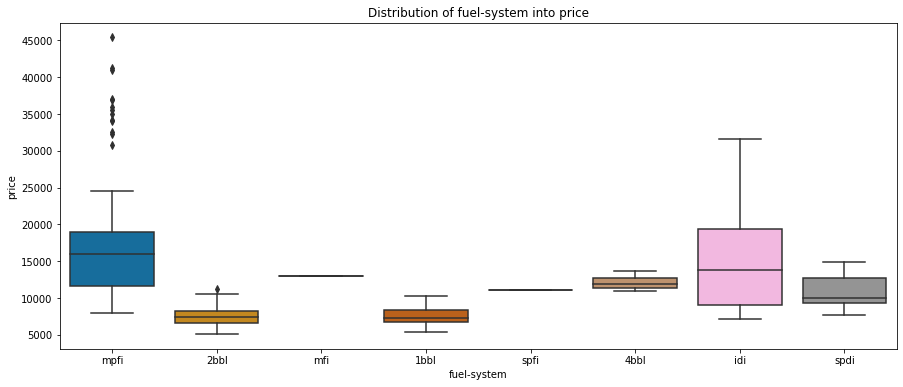

In [39]:
# Plotting Distribution of fuel_system into price
plt.figure(figsize=(15,6))
sns.boxplot(x='fuel-system',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of fuel-system into price');

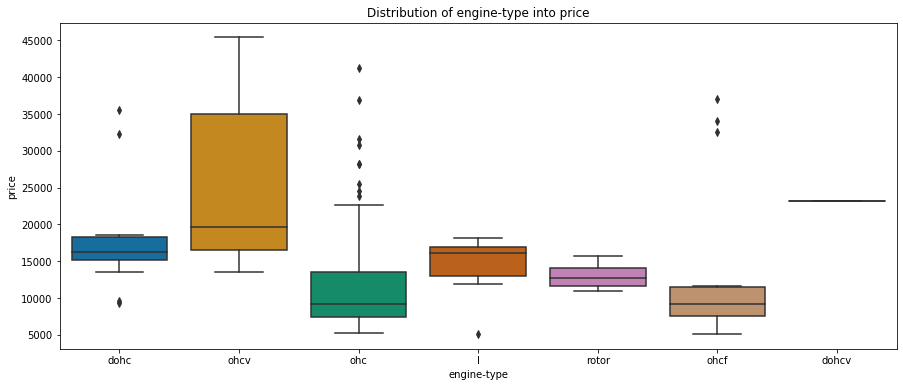

In [40]:
# Plotting Distribution of engine_type into price
plt.figure(figsize=(15,6))
sns.boxplot(x='engine-type',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of engine-type into price');

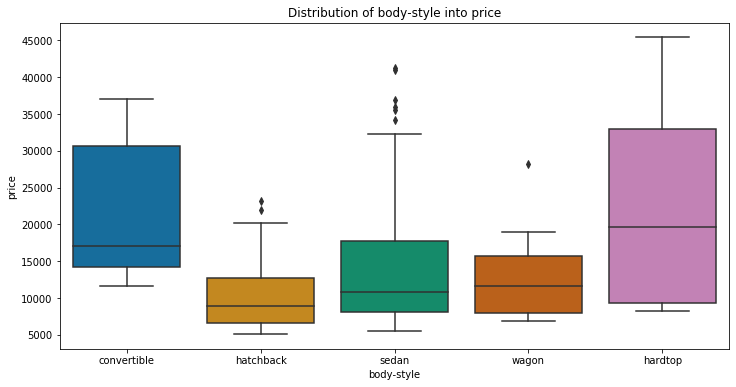

In [41]:
# Plotting Distribution of body_style into price
plt.figure(figsize=(12,6))
sns.boxplot(x='body-style',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of body-style into price');

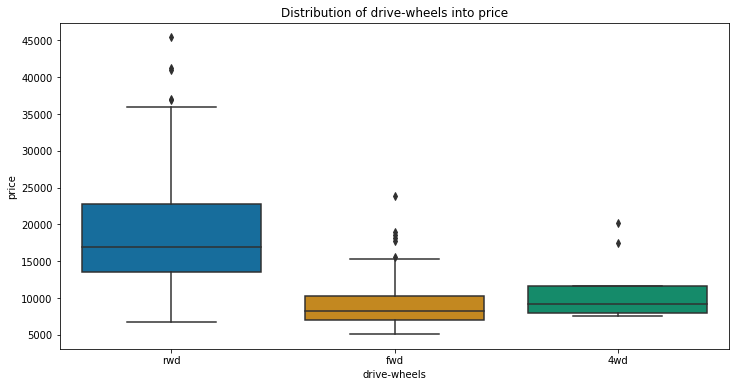

In [42]:
# Plotting Distribution of drive_wheels into price
plt.figure(figsize=(12,6))
sns.boxplot(x='drive-wheels',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of drive-wheels into price');

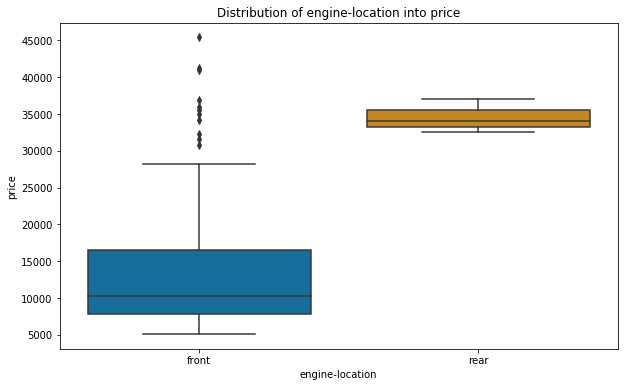

In [43]:
# Plotting Distribution of engine_location into price
plt.figure(figsize=(10,6))
sns.boxplot(x='engine-location',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of engine-location into price');

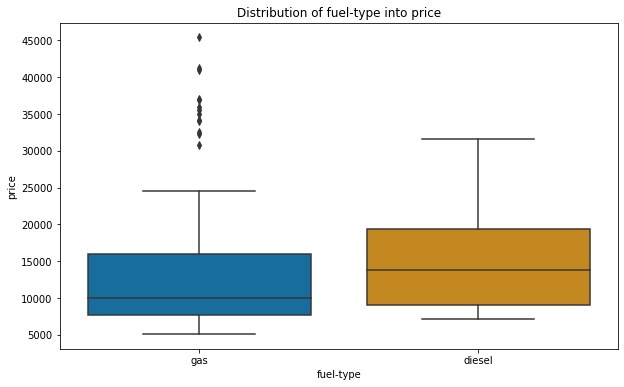

In [44]:
# Plotting Distribution of fuel_type into price
plt.figure(figsize=(10,6))
sns.boxplot(x='fuel-type',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of fuel-type into price');

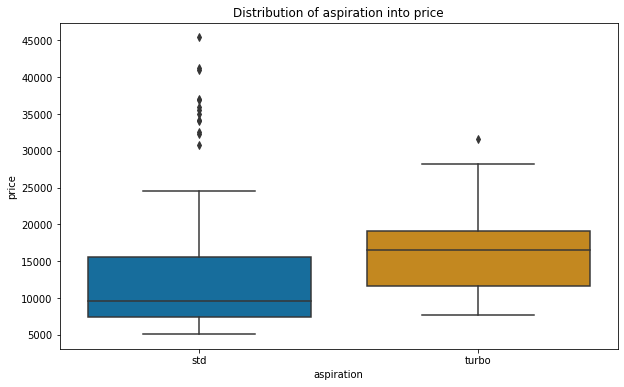

In [45]:
# Plotting Distribution of aspiration into price
plt.figure(figsize=(10,6))
sns.boxplot(x='aspiration',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of aspiration into price');

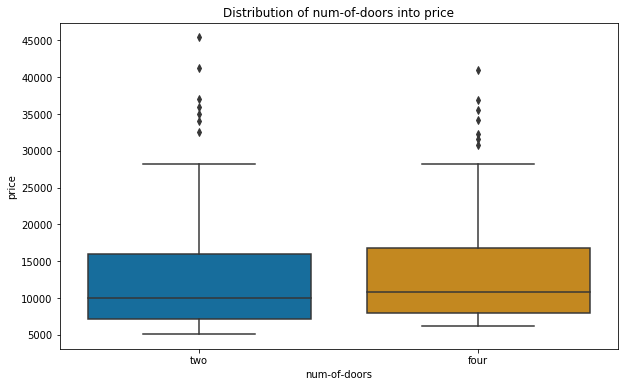

In [46]:
# Plotting Distribution of num_of_doors into price
plt.figure(figsize=(10,6))
sns.boxplot(x='num-of-doors',y='price',data=car, 
                 palette="colorblind")
plt.title('Distribution of num-of-doors into price');

## Feature Engineering:

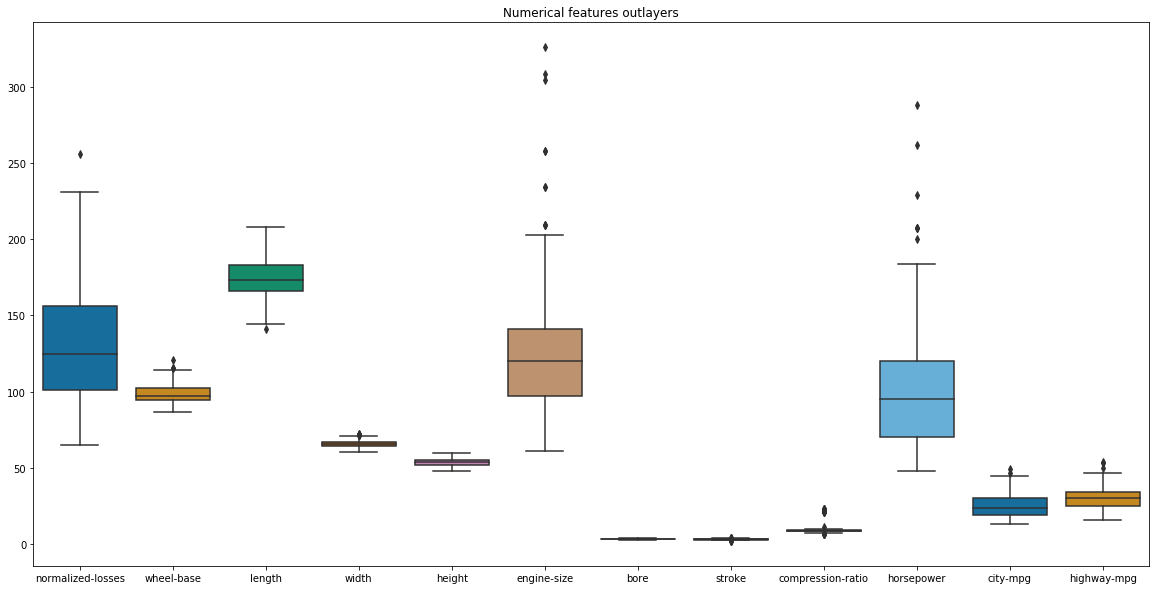

In [47]:
# Plotting boxplots to numeric features
num_var = ['normalized-losses','wheel-base','length'
          ,'width','height','engine-size','bore'
           ,'stroke','compression-ratio','horsepower'
           ,'city-mpg','highway-mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=car[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

In [49]:
# creating a for to replace outlayers using boxplot method
for i in num_var:
    # taking quantiles
    Q1 = car[i].quantile(0.25)
    Q3 = car[i].quantile(0.75)
    IQR = Q3 - Q1 # calculating IQR
    car[i] = np.where(car[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),car[i]) # removing outlayers
    car[i] = np.where(car[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),car[i]) # removing outlayers

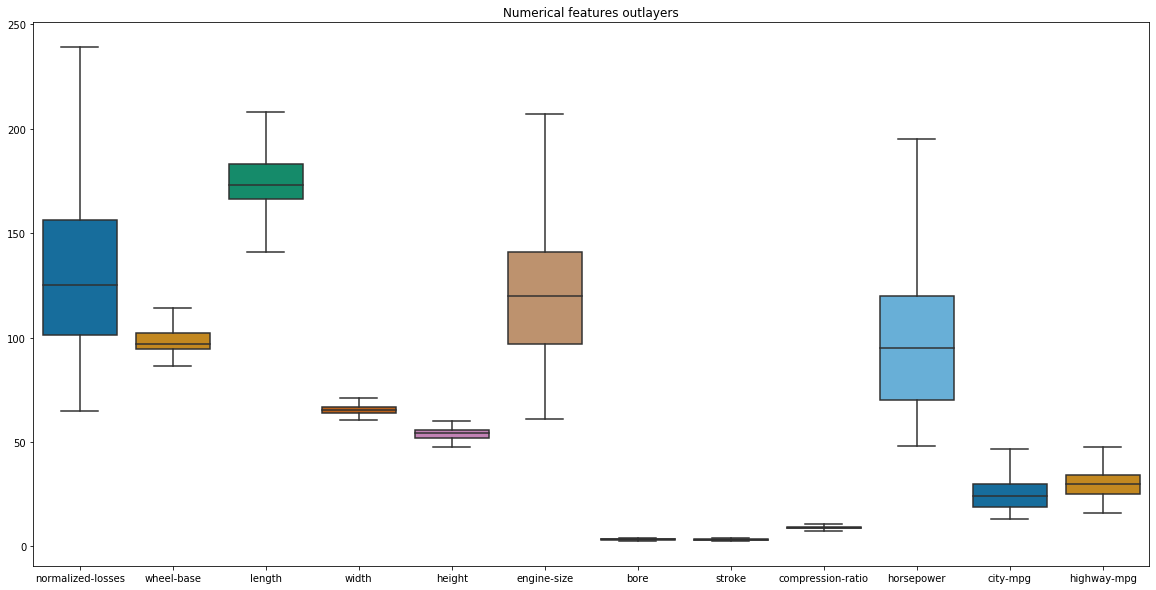

In [50]:
# Plotting boxplots to numeric features
num_var = ['normalized-losses','wheel-base','length'
          ,'width','height','engine-size','bore'
           ,'stroke','compression-ratio','horsepower'
           ,'city-mpg','highway-mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=car[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

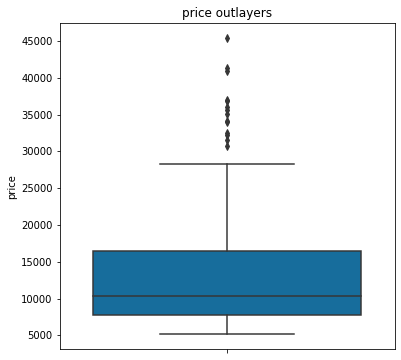

In [51]:
# Plotting a boxplot of our target to visualize outlayers
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=car, 
                 palette="colorblind")
plt.title('price outlayers');

In [52]:
# Replace outlayers using boxplot method
Q1 = car['price'].quantile(0.25) # taking Q1
Q3 = car['price'].quantile(0.75) # taking Q3
IQR = Q3 - Q1 # calculating IQR
car['price'] = np.where(car['price']>(Q3+1.5*IQR),(Q3+1.5*IQR),car['price']) # removing outlayers
car['price'] = np.where(car['price']<(Q1-1.5*IQR),(Q1-1.5*IQR),car['price']) # removing outlayers

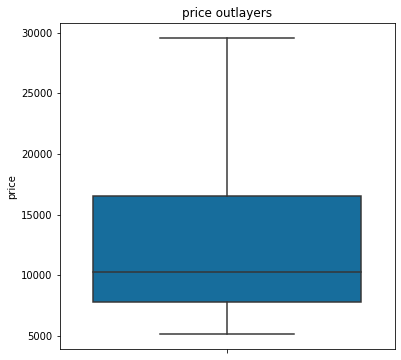

In [53]:
# Visualizing if outlayers was removed
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=car, 
                 palette="colorblind")
plt.title('price outlayers');

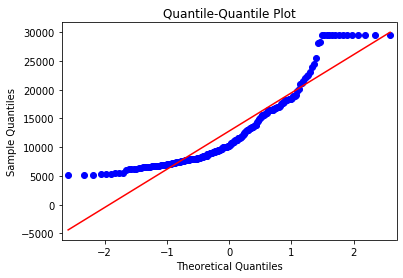

In [54]:
# Quantile-Quantile Plot to virify normal distributions
qqplot(car['price'], line='s')
plt.title('Quantile-Quantile Plot')
plt.show()

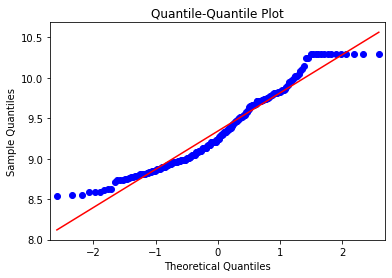

In [55]:
# Log-transformation of the target variable
car['price'] = np.log1p(car['price'])

# Quantile-Quantile Plot to virify normal distributions
qqplot(car['price'], line='s')
plt.title('Quantile-Quantile Plot')
plt.show()

In [56]:
# Converting num_of_cylinders into a continuos variable
car['num-of-cylinders'][car['num-of-cylinders']=='two'] = 2
car['num-of-cylinders'][car['num-of-cylinders']=='three'] = 3
car['num-of-cylinders'][car['num-of-cylinders']=='four'] = 4
car['num-of-cylinders'][car['num-of-cylinders']=='five'] = 5
car['num-of-cylinders'][car['num-of-cylinders']=='six'] = 6
car['num-of-cylinders'][car['num-of-cylinders']=='eight'] = 8
car['num-of-cylinders'][car['num-of-cylinders']=='twelve'] = 12

# converting into integer
car['num-of-cylinders'] = car['num-of-cylinders'].astype('int64')

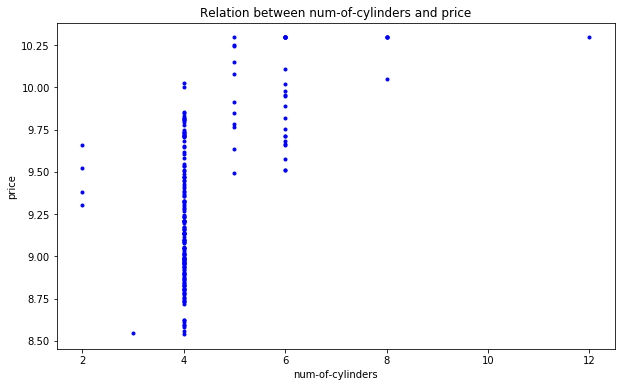

In [58]:
# Plotting a scatter plot of relation between num_of_cylinders and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['num-of-cylinders'] # plotting
         ,car['price'],'.'
        ,color='blue')

plt.xlabel('num-of-cylinders')
plt.ylabel('price')
plt.title('Relation between num-of-cylinders and price');

In [59]:
# taking numerical features to log trasformation
num_var = ['normalized-losses','wheel-base','length'
          ,'width','height','curb-weight','engine-size','bore'
           ,'stroke','compression-ratio','horsepower','peak-rpm'
           ,'city-mpg','highway-mpg','num-of-cylinders']

car[num_var] = np.log1p(car[num_var]) # log transformation

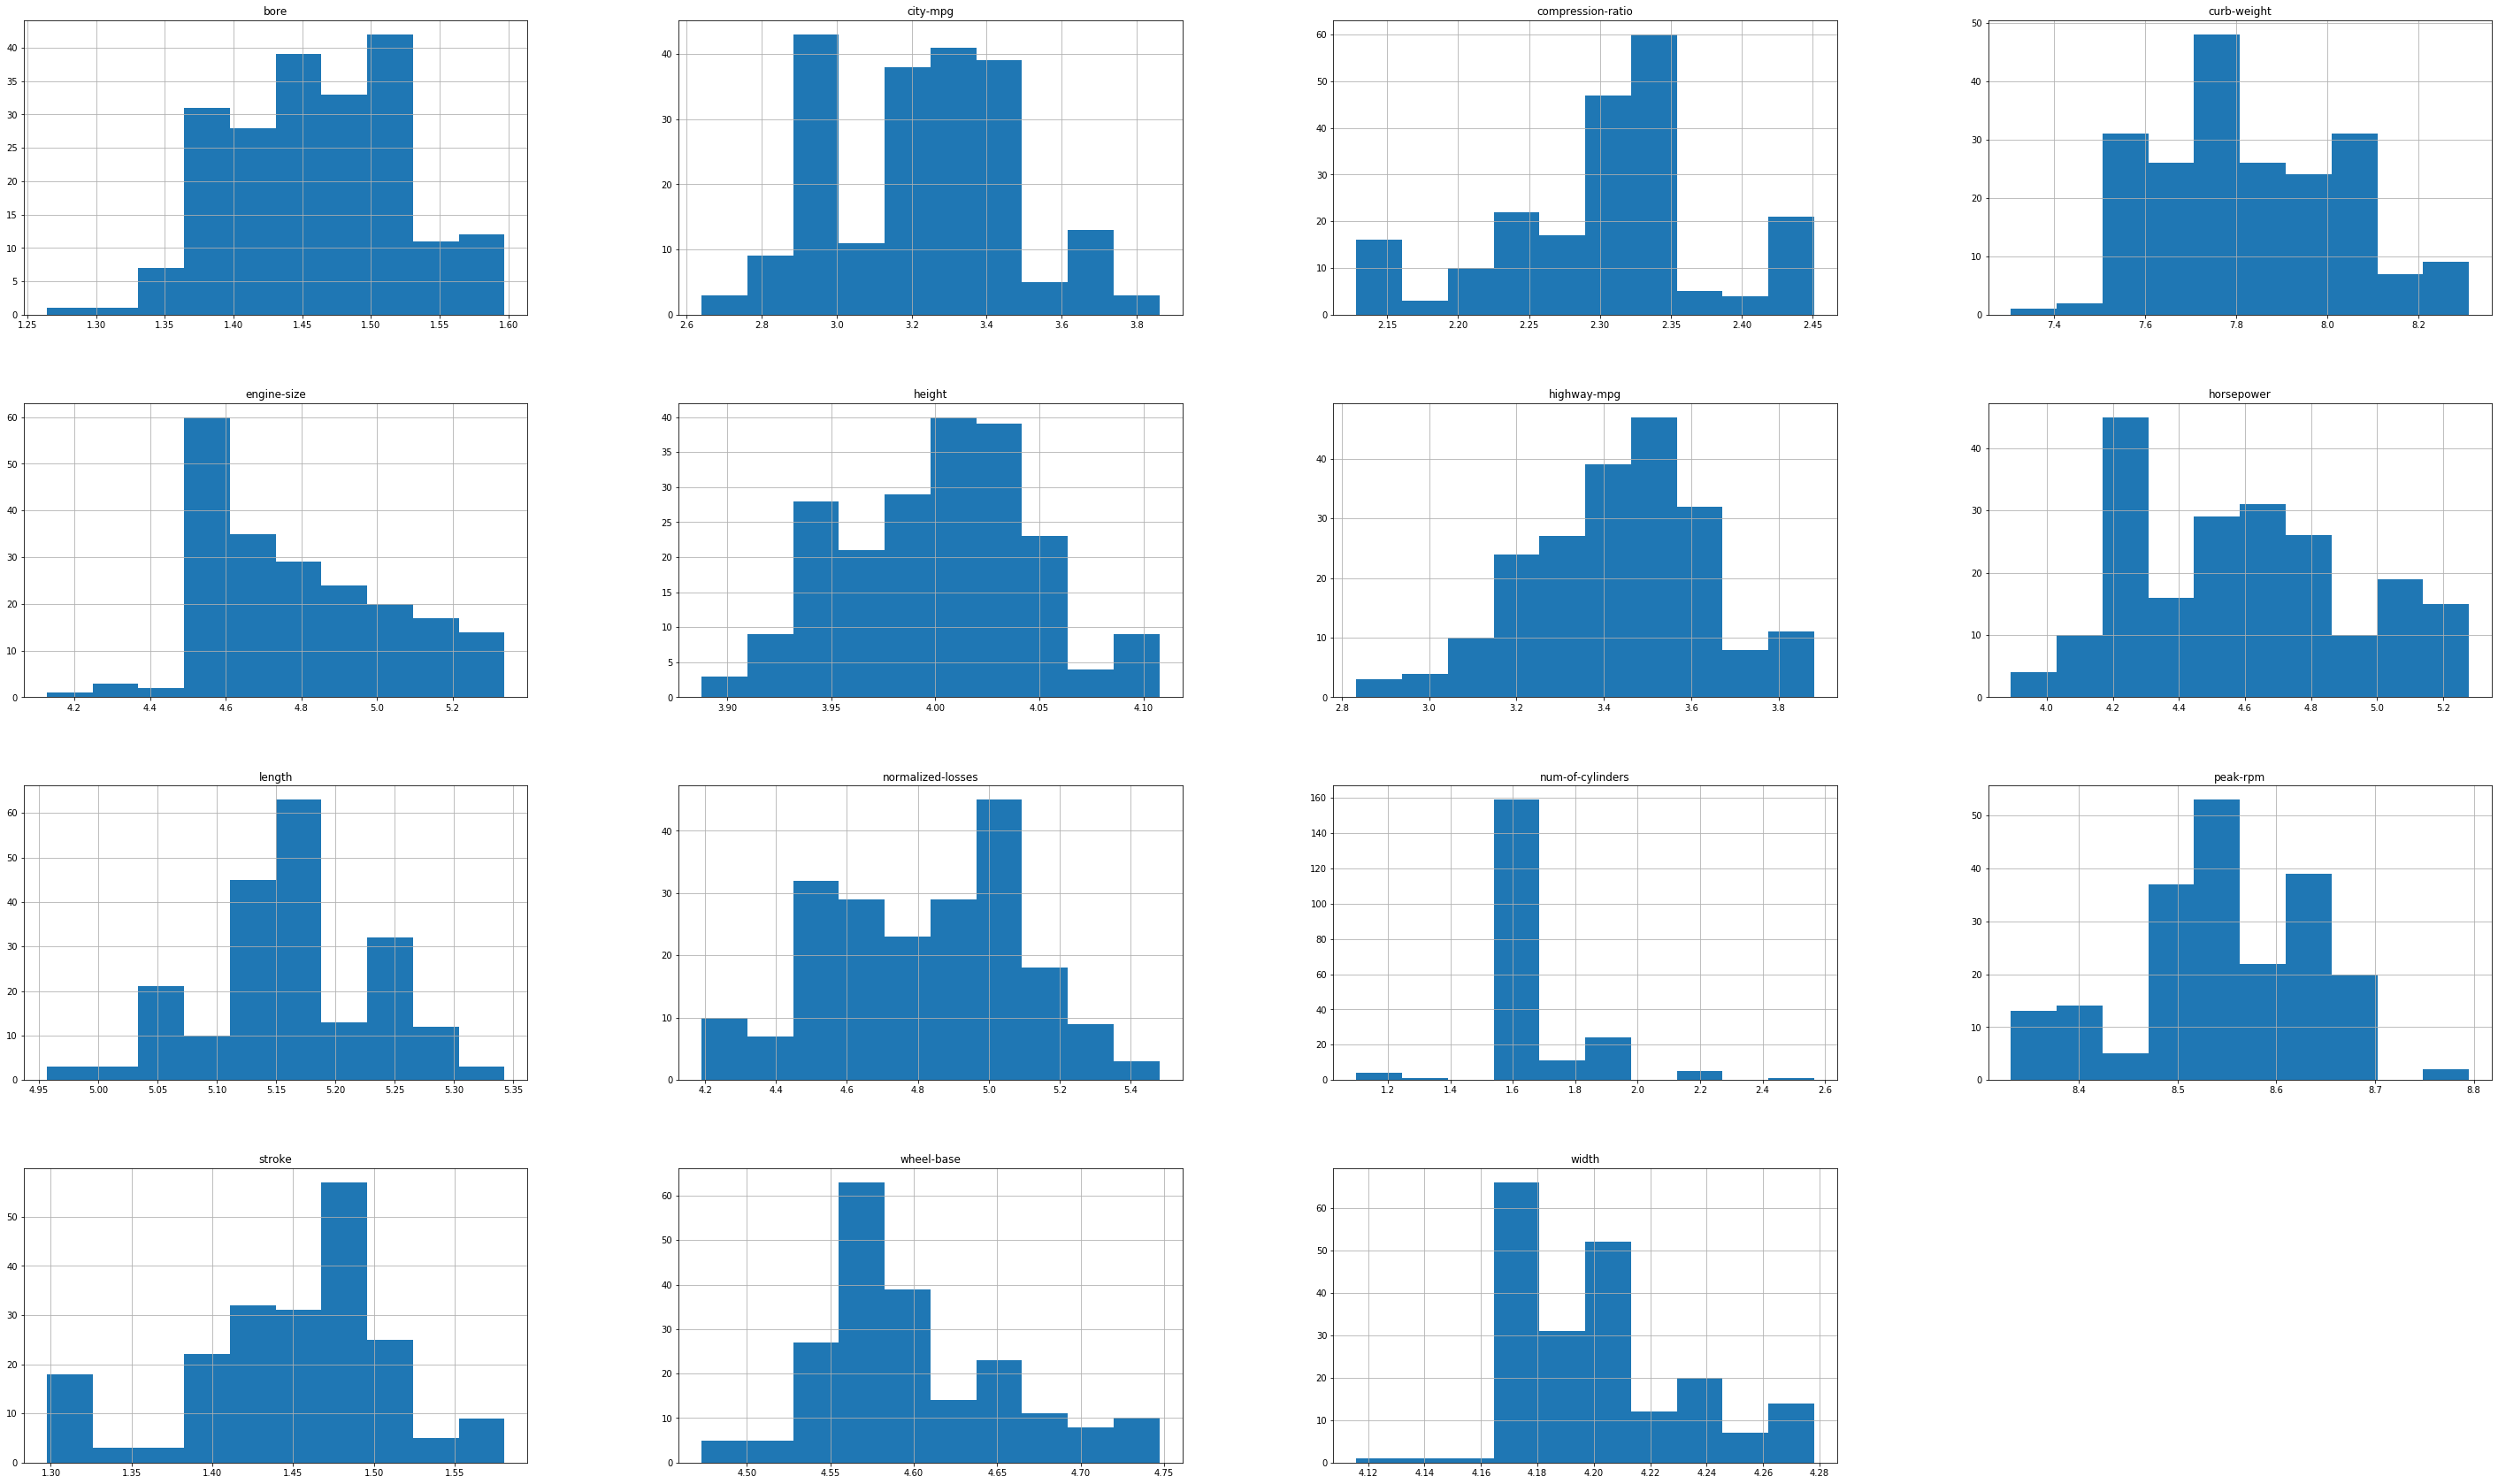

In [60]:
# plotting a histogram for each feature
car[num_var].hist(bins=10
                   , figsize=(50,30)
                   , layout=(4,4));

In [61]:
# relation between length and width
car['len_wid'] = car['length']/car['width']

# relation between wheel_base and curb_weight
car['whb_c_wght'] = car['wheel-base']/car['curb-weight']

# relation between horsepower and engine_size
car['hpw_eng_size'] = car['horsepower']/car['engine-size']

# relation between highway_mpg and city_mpg
car['hway_cit_mpg'] = car['highway-mpg']/car['city-mpg']

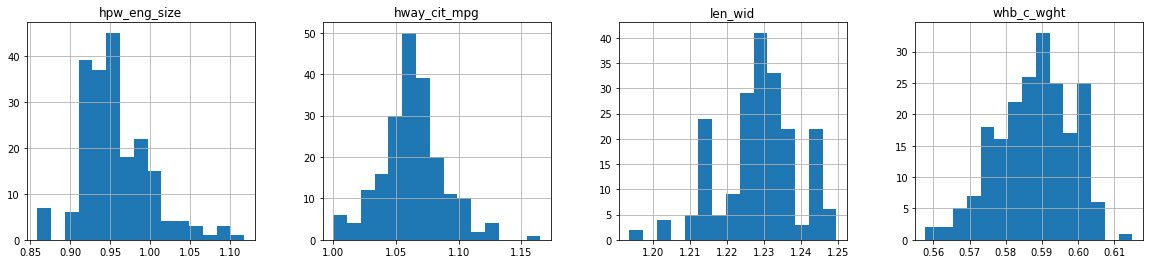

In [62]:
# Saving new features
new_feat1 = ['len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg']

# plotting a histogram for each feature
car[new_feat1].hist(bins=15
                   , figsize=(20,4)
                   , layout=(1,4));

In [63]:
# creating a feature to represent the mean mpg
car['mean_mpg'] = (car['highway-mpg']+car['city-mpg'])/2

# creating a feature to represent the horsepower per cylinders
car['hpw_cylinders'] = car['horsepower']/car['num-of-cylinders']

# creating a feature to represent the mean mpg per horsepower
car['mean_mpg_hpw'] = car['mean_mpg']/car['horsepower']

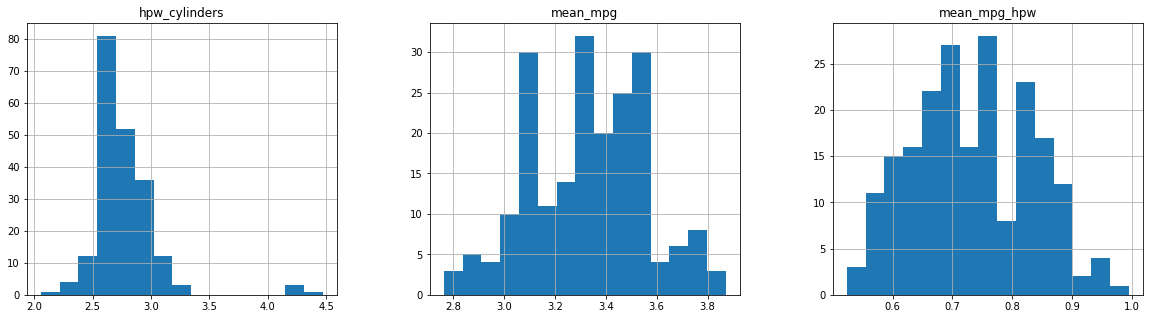

In [64]:
# Saving new features
new_feat2 = ['mean_mpg','hpw_cylinders','mean_mpg_hpw']

# plotting a histogram for each feature
car[new_feat2].hist(bins=15
                   , figsize=(20,5)
                   , layout=(1,3));

In [65]:
# Converting engine_location into binary
car['engine-location'] = np.where(car['engine-location']=='front',2,1)

# Converting fuel_type into binary
car['fuel-type'] = np.where(car['fuel-type']=='gas',2,1)

# Converting aspiration into binary
car['aspiration'] = np.where(car['aspiration']=='std',2,1)

# Converting num_of_doors into binary
car['num-of-doors'] = np.where(car['num-of-doors']=='two',2,1)

In [66]:
# converting maker to continuos based on boxplots
car['make'][car['make']=='chevrolet'] = 1
car['make'][car['make']=='renault'] = 2
car['make'][car['make']=='isuzu'] = 3
car['make'][car['make']=='subaru'] = 4
car['make'][car['make']=='plymouth'] = 5
car['make'][car['make']=='dodge'] = 6
car['make'][car['make']=='honda'] = 7
car['make'][car['make']=='volkswagen'] = 8
car['make'][car['make']=='mitsubishi'] = 9
car['make'][car['make']=='alfa-romero'] = 10
car['make'][car['make']=='mercury'] = 11
car['make'][car['make']=='toyota'] = 12
car['make'][car['make']=='peugot'] = 13
car['make'][car['make']=='mazda'] = 14
car['make'][car['make']=='saab'] = 15
car['make'][car['make']=='nissan'] = 16
car['make'][car['make']=='volvo'] = 17
car['make'][car['make']=='audi'] = 18
car['make'][car['make']=='jaguar'] = 19
car['make'][car['make']=='porsche'] = 20
car['make'][car['make']=='bmw'] = 21
car['make'][car['make']=='mercedes-benz'] = 22
car['make']=car['make'].astype('int64')

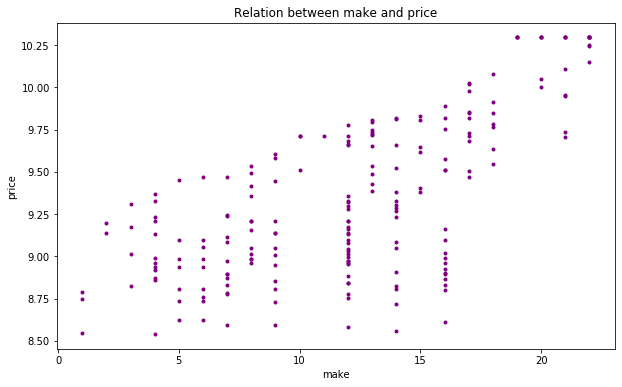

In [67]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['make'] # plotting
         ,car['price'],'.'
        ,color='purple')

plt.xlabel('make')
plt.ylabel('price')
plt.title('Relation between make and price');

In [68]:
# converting fuel_system to continuos based on boxplots
car['fuel-system'][car['fuel-system']=='1bbl'] = 1
car['fuel-system'][car['fuel-system']=='spfi'] = 2
car['fuel-system'][car['fuel-system']=='2bbl'] = 3
car['fuel-system'][car['fuel-system']=='mfi'] = 4
car['fuel-system'][car['fuel-system']=='4bbl'] = 5
car['fuel-system'][car['fuel-system']=='spdi'] = 6
car['fuel-system'][car['fuel-system']=='idi'] = 7
car['fuel-system'][car['fuel-system']=='mpfi'] = 8
car['fuel-system']=car['fuel-system'].astype('int64')

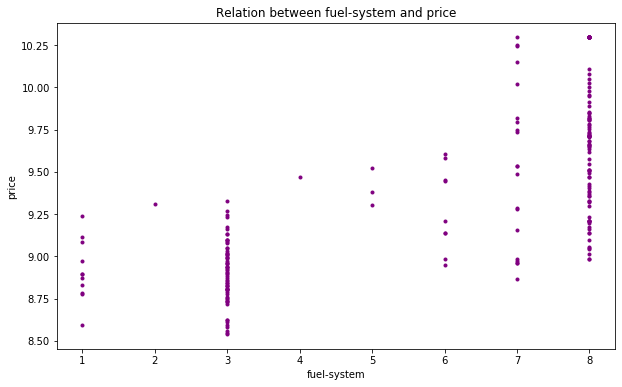

In [69]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['fuel-system'] # plotting
         ,car['price'],'.'
        ,color='purple')

plt.xlabel('fuel-system')
plt.ylabel('price')
plt.title('Relation between fuel-system and price');

In [70]:
# converting engine_type to continuos based on boxplots
car['engine-type'][car['engine-type']=='rotor'] = 1
car['engine-type'][car['engine-type']=='l'] = 2
car['engine-type'][car['engine-type']=='dohcv'] = 3
car['engine-type'][car['engine-type']=='dohc'] = 4
car['engine-type'][car['engine-type']=='ohcf'] = 5
car['engine-type'][car['engine-type']=='ohc'] = 6
car['engine-type'][car['engine-type']=='ohcv'] = 7
car['engine-type']=car['engine-type'].astype('int64')

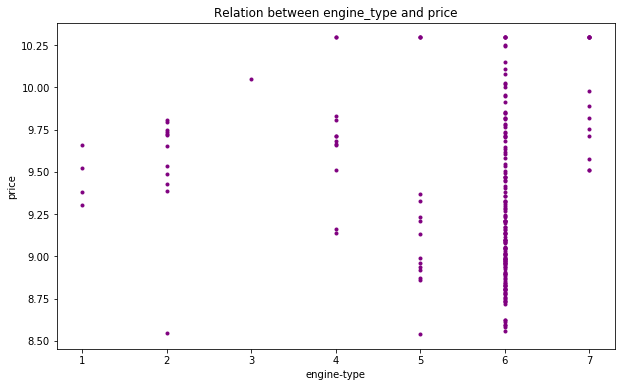

In [71]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['engine-type'] # plotting
         ,car['price'],'.'
        ,color='purple')

plt.xlabel('engine-type')
plt.ylabel('price')
plt.title('Relation between engine_type and price');

In [72]:
# converting body_style to continuos based on boxplots
car['body-style'][car['body-style']=='hatchback'] = 1
car['body-style'][car['body-style']=='wagon'] = 2
car['body-style'][car['body-style']=='convertible'] = 4
car['body-style'][car['body-style']=='sedan'] = 3
car['body-style'][car['body-style']=='hardtop'] = 5
car['body-style']=car['body-style'].astype('int64')

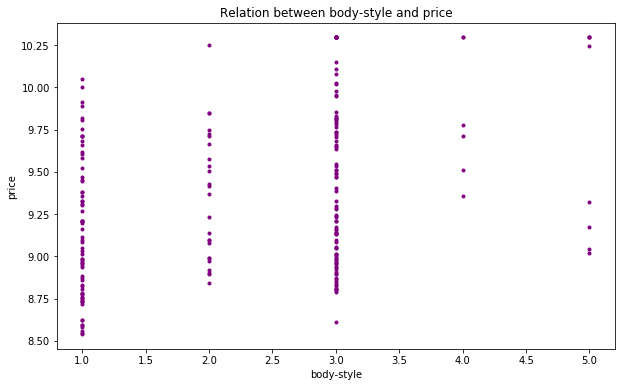

In [73]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['body-style'] # plotting
         ,car['price'],'.'
        ,color='purple')

plt.xlabel('body-style')
plt.ylabel('price')
plt.title('Relation between body-style and price');

In [74]:
# converting drive_wheels to continuos based on boxplots
car['drive-wheels'][car['drive-wheels']=='4wd'] = 1
car['drive-wheels'][car['drive-wheels']=='fwd'] = 2
car['drive-wheels'][car['drive-wheels']=='rwd'] = 3
car['drive-wheels']=car['drive-wheels'].astype('int64')

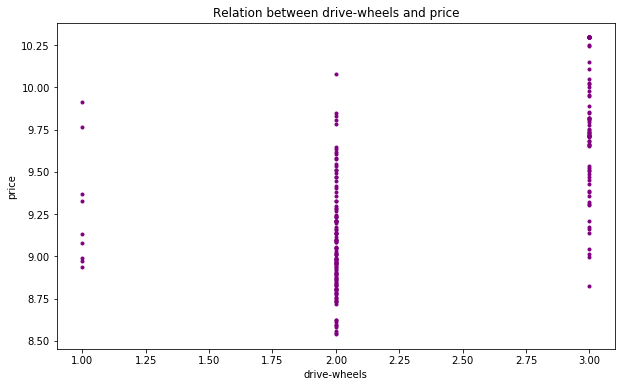

In [75]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(car['drive-wheels'] # plotting
         ,car['price'],'.'
        ,color='purple')

plt.xlabel('drive-wheels')
plt.ylabel('price')
plt.title('Relation between drive-wheels and price');

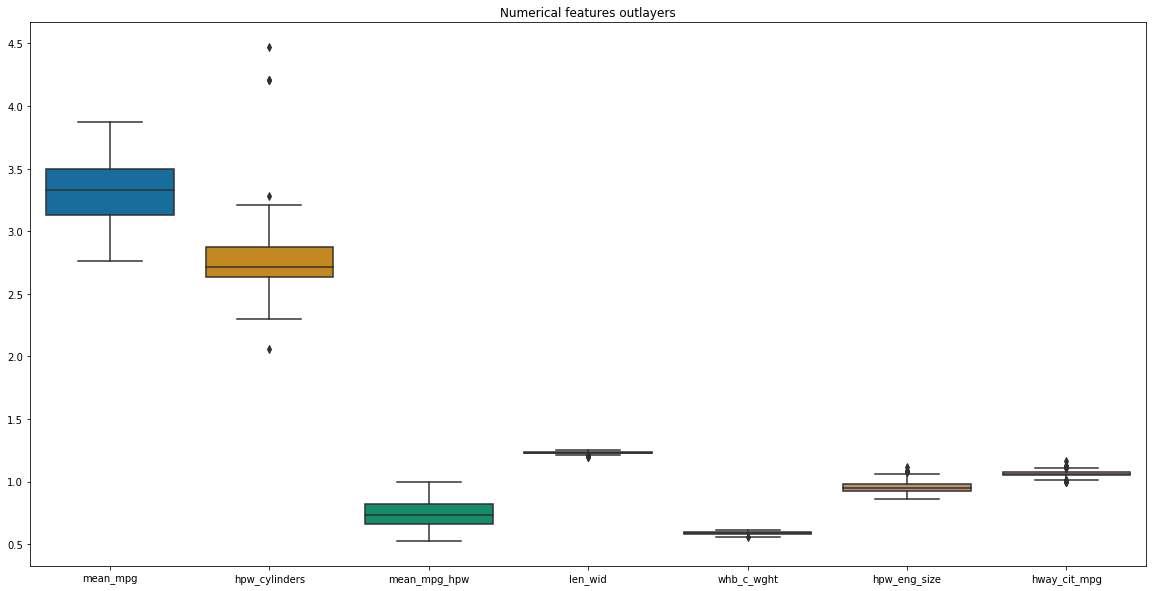

In [76]:
# Plotting boxplots to numeric features
num_var = ['mean_mpg','hpw_cylinders','mean_mpg_hpw'
           ,'len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=car[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

In [77]:
# creating a for to replace outlayers using boxplot method
for i in num_var:
    Q1 = car[i].quantile(0.25)
    Q3 = car[i].quantile(0.75)
    IQR = Q3 - Q1
    car[i] = np.where(car[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),car[i])
    car[i] = np.where(car[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),car[i])

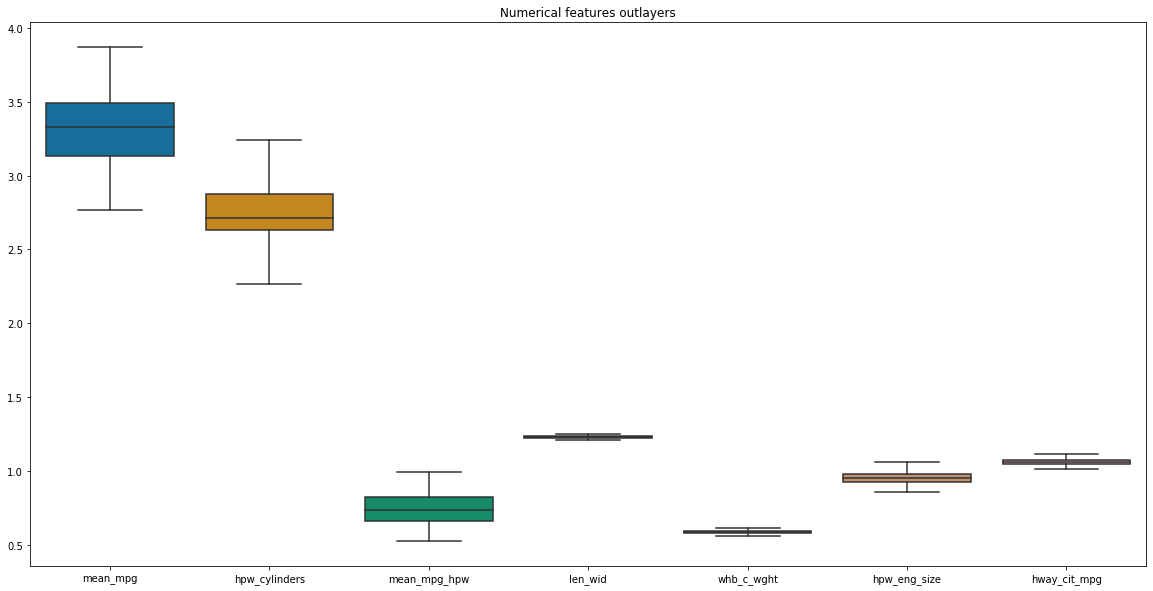

In [78]:
# Plotting boxplots to numeric features
num_var = ['mean_mpg','hpw_cylinders','mean_mpg_hpw'
           ,'len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=car[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

In [79]:
# taking numerical features to log trasformation
num_var = ['mean_mpg','hpw_cylinders','mean_mpg_hpw'
           ,'len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg'
          ,'make','drive-wheels','body-style','engine-type','fuel-system'
          ,'engine-location','fuel-type','aspiration','num-of-doors']

car[num_var] = np.log1p(car[num_var]) # log transformation

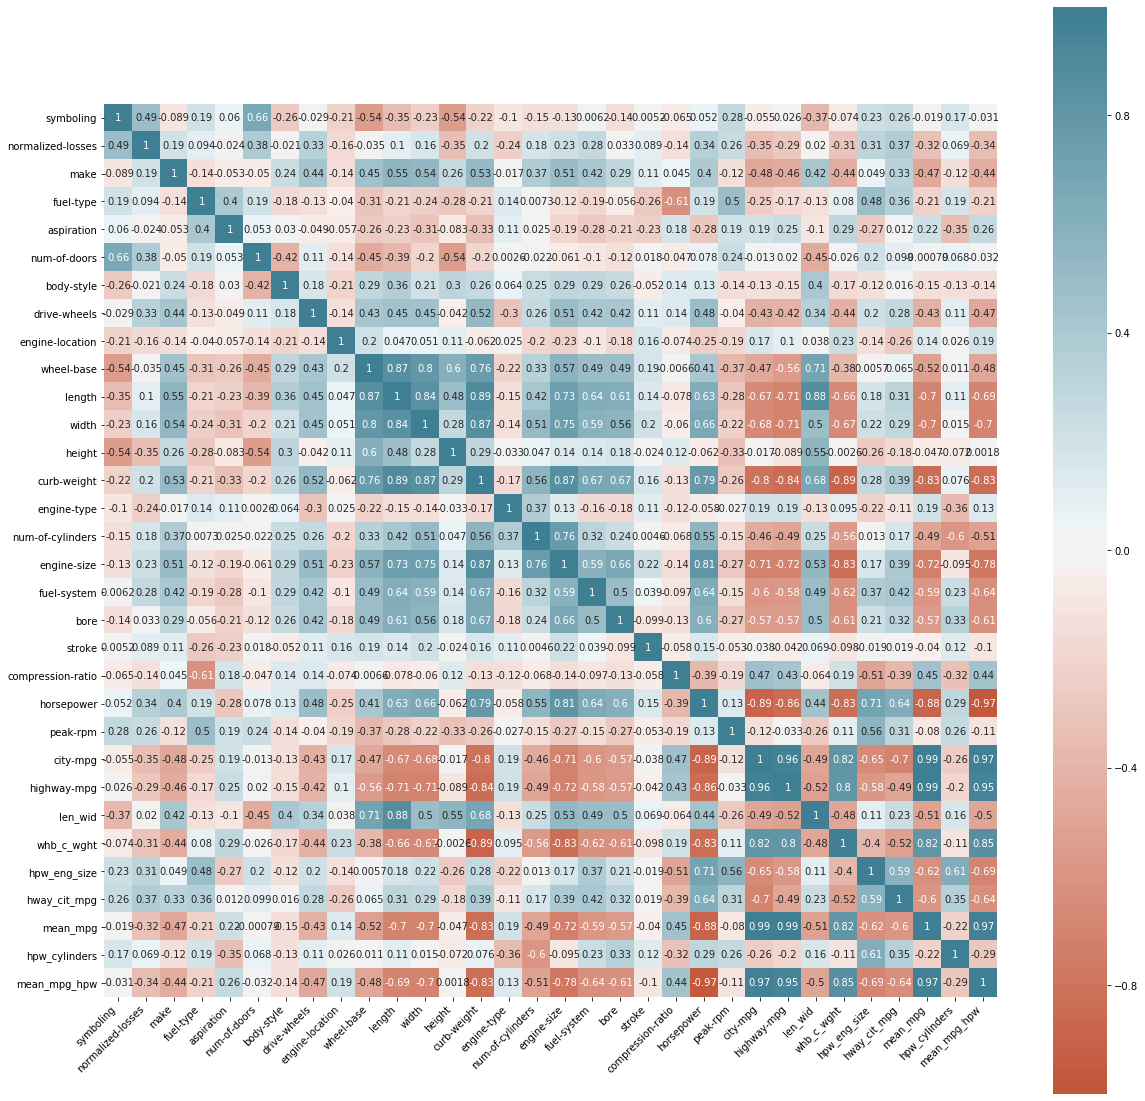

In [80]:
# Numerical variables correlation
car_noprice = car.drop('price',axis=1) # removing price column

corr = car_noprice.corr() # creting the correlation matrix

plt.figure(figsize=(20,20)) # creating the and difyning figure size
ax = sns.heatmap( # plotting correlation matrix
    corr,vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels( # adding axes values
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [81]:
# creating the correlation matrix
corr_matrix = car_noprice.corr().abs()

# creating a mask to apply to our correlation matrix and filter high correlations
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))

# replacing low correlations with NA's
tri_df = corr_matrix.mask(mask)

# selecting features to dropp that have correlation with each other above 0.80
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.8)]

# dropping high correlated features
car = car.drop(to_drop,axis=1)

In [82]:
price = car['price'] #saving prices
car = car.drop('price',axis=1) # dropping prices from cars dataset
car['price'] = price # joing prices into our dataset again

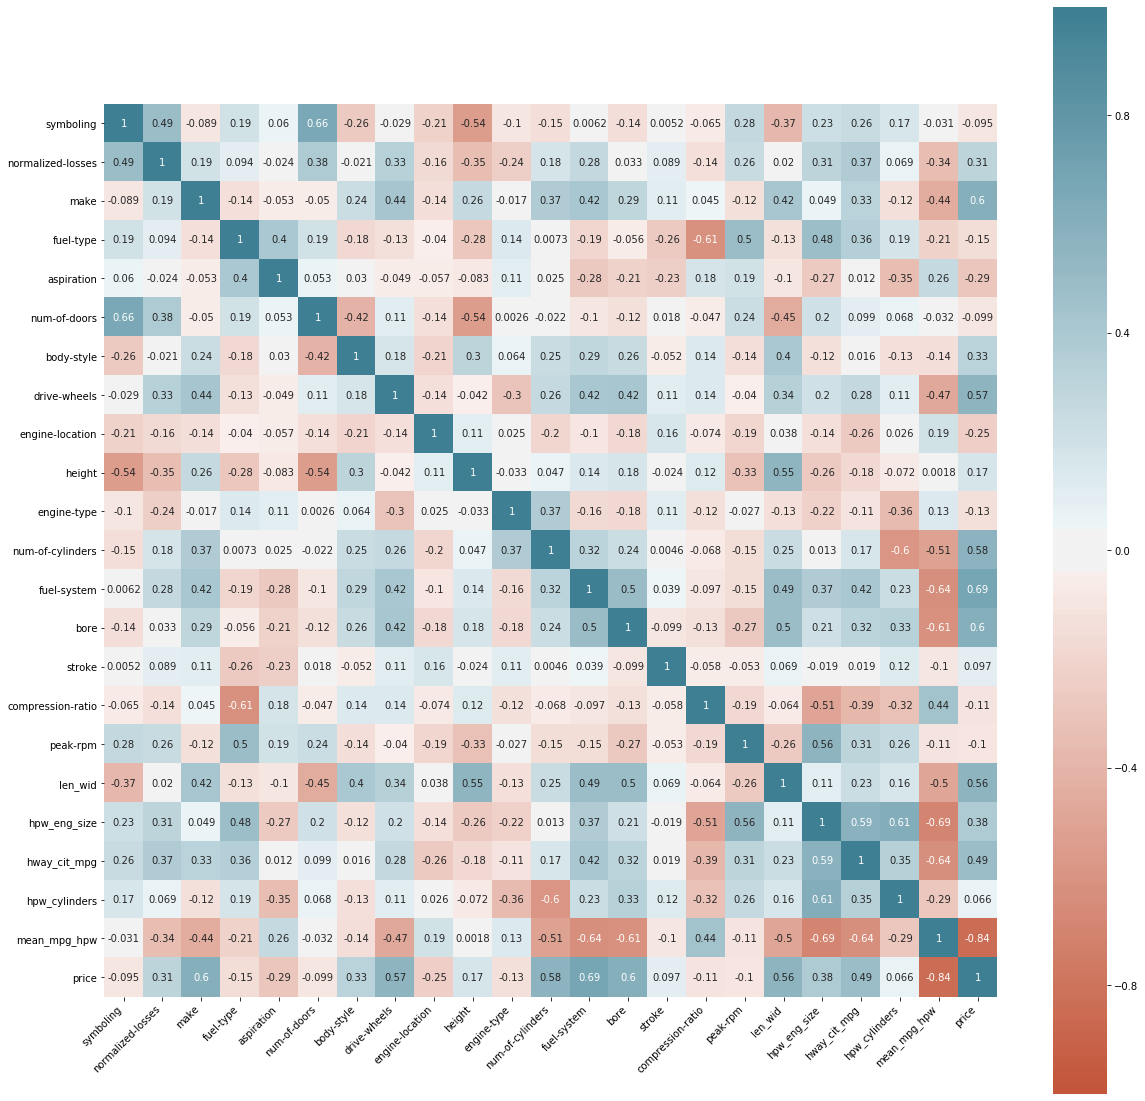

In [83]:
# Numerical variables correlation
corr = car.corr() # creting the correlation matrix

plt.figure(figsize=(20,20)) # creating the and difyning figure size
ax = sns.heatmap( # plotting correlation matrix
    corr,vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels( # adding axes values
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [84]:
price = car['price'] #saving prices
cars = car.drop('price',axis=1) # dropping prices from cars dataset
car['price'] = price # joing prices into our dataset again